<h1><center>Airline Passenger Satisfaction - Classification project</center></h1>

<h2><center>Julia Taborek</center></h2>

# 1. Introduction

### About Dataset

#### Context

This dataset contains an airline passenger satisfaction survey.

#### Content

1. **Gender** : Gender of the passengers (*Female*, *Male*)


2. **Customer Type**: The customer type (*Loyal customer*, *disloyal customer*)


3. **Age**: The actual age of the passengers


4. **Type of Travel**: Purpose of the flight of the passengers (*Personal Travel*, *Business Travel*)


5. **Class**: Travel class in the plane of the passengers (*Business*, *Eco*, *Eco Plus*)


6. **Flight distance**: The flight distance of this journey


7. **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)


8. **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient


9. **Ease of Online booking**: Satisfaction level of online booking


10. **Gate location**: Satisfaction level of Gate location


11. **Food and drink**: Satisfaction level of Food and drink


12. **Online boarding**: Satisfaction level of online boarding


13. **Seat comfort**: Satisfaction level of Seat comfort


14. **Inflight entertainment**: Satisfaction level of inflight entertainment


15. **On-board service**: Satisfaction level of On-board service


16. **Leg room service**: Satisfaction level of Leg room service


17. **Baggage handling**: Satisfaction level of baggage handling


18. **Check-in service**: Satisfaction level of Check-in service


19. **Inflight service**: Satisfaction level of inflight service


20. **Cleanliness**: Satisfaction level of Cleanliness


21. **Departure Delay in Minutes**: Minutes delayed when departure


22. **Arrival Delay in Minutes**: Minutes delayed when Arrival


23. **Satisfaction**: Airline satisfaction level(*Satisfaction*, *neutral or dissatisfaction*)

#### Task:
Predict passenger satisfaction.

# 2. Main part

## 2.1 Data acquisition

### Importing data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.computation.check import NUMEXPR_INSTALLED

C:\Users\julia\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("train.csv")

### Dataset

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
np.sum(df.isna())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

**Observations**:

- The table contains the results of the survey for 103904 people.

- The column "Arrival Delay in Minutes" has 310 missing values.

- Columns: "*Gender*", "*Customer Type*", "*Type of Travel*", "*Class*" and "*satisfaction*" contain object values. Other columns contain numeric values.

- First two columns are useless for classification.

### Description of numeric data

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.drop(['id','Unnamed: 0'], axis = 1, inplace=True)

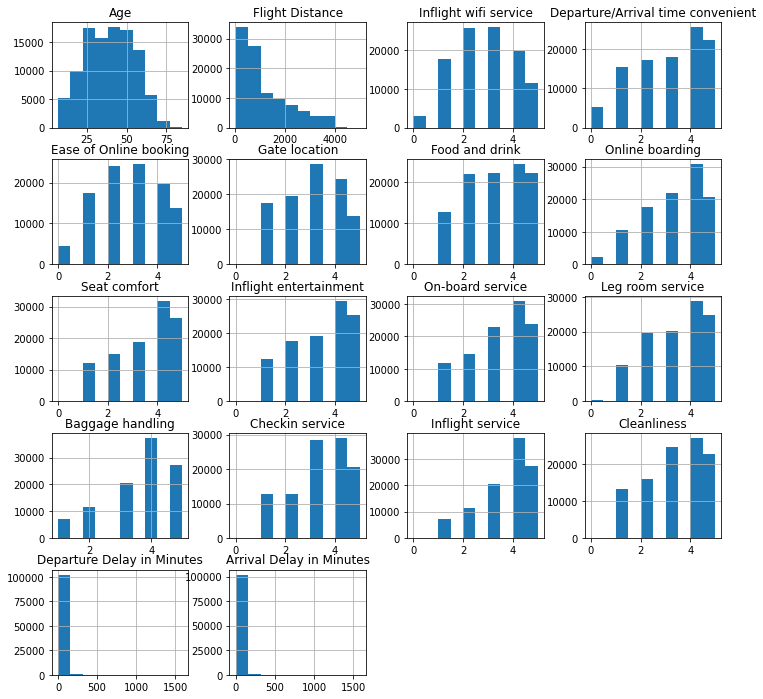

In [8]:
df.hist(figsize = (12,12))
plt.show()

- Variables: "Arrival Delay in Minutes" and "Departure Delay in Minutes" have a long-tailed distribution 
- Attributes are presented in different scales: age in the range of up to 80, delay in thousands of minutes, distance in thousands, other variables in scale 0-5. Before training the model, data must be scaled.

### Test and train split

In [9]:
from sklearn.model_selection import train_test_split

# dividing the data into a train and testing set
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
train_set.shape

(83123, 23)

In [11]:
test_set.shape

(20781, 23)

## 2.2 Data analysis

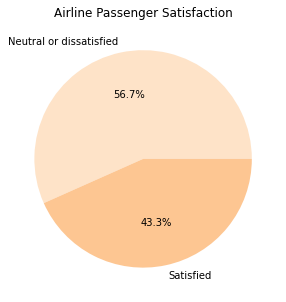

In [12]:
plt.figure(figsize = (5,5))
plt.pie(df['satisfaction'].value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Oranges"), autopct = '%1.1f%%')
plt.title('Airline Passenger Satisfaction')
plt.show()

In [13]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Variable "*satisfaction*" is balanced: 43% of passengers were satisfed and others were neutral or dissatisfied.

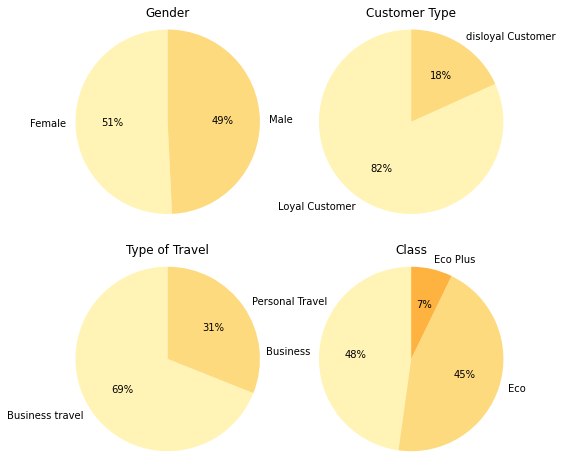

In [14]:
categ = df.iloc[:,[0,1,3,4]]
fig, axes = plt.subplots(2,2, figsize = (8, 8))
for i, col in enumerate(categ):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

#### Observations:

- Number of men and women who took part in this survey is approximately the same,
- Most of passengers are loyal customers,
- Most common type of travel is business,
- Passengers rarely choose the eco plus class

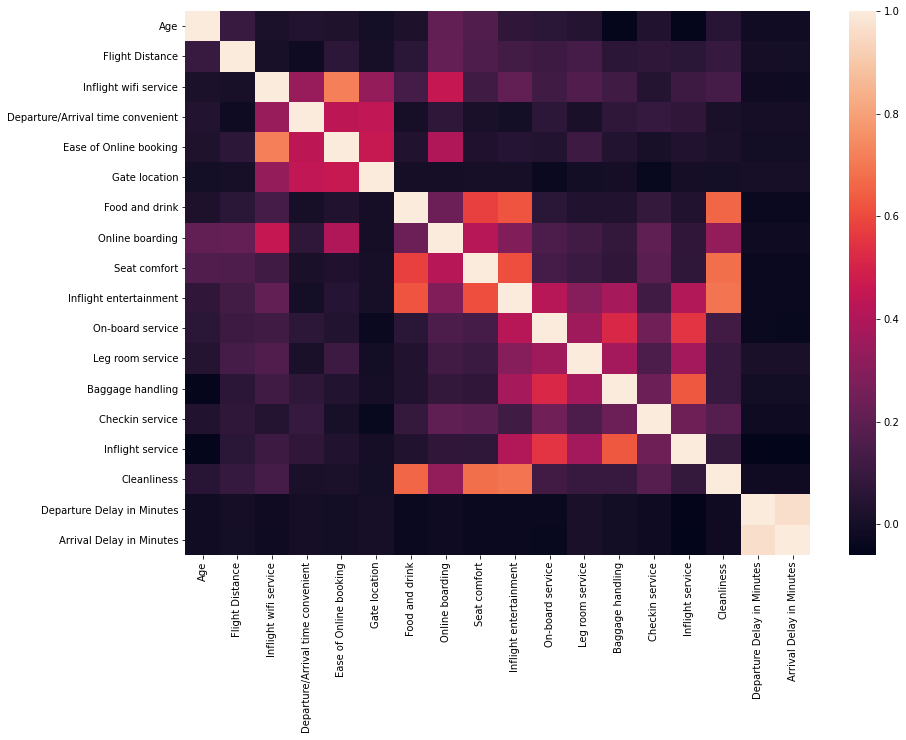

In [95]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.heatmap(correlation)
plt.show()

Since there was a large correlation between the variables: Departure Delay in Minutes and Arrival Delay in Minutes, I presented this relationship on a separate chart:

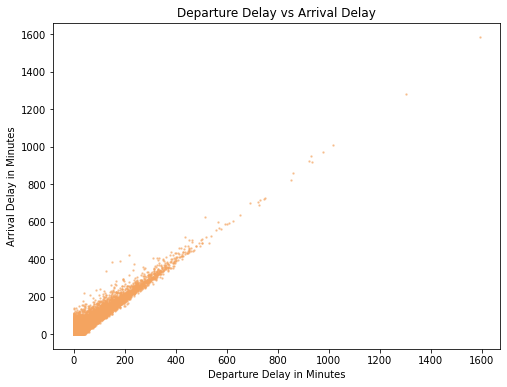

In [15]:
plt.figure(figsize=(8,6))
plt.title('Departure Delay vs Arrival Delay')
plt.scatter(df['Departure Delay in Minutes'], df['Arrival Delay in Minutes'], s=2, c='sandybrown', alpha = 0.5)
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')
plt.show()

We can see from the graph that the relationship between the variables is linear. 

This has a logical explanation, because usually a plane that left with a delay will also land with a similar delay

<Figure size 2160x2160 with 0 Axes>

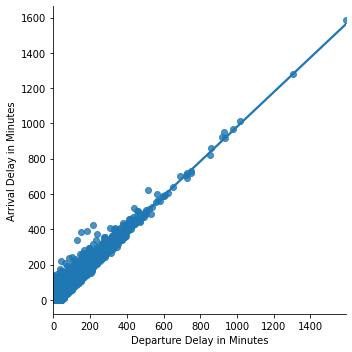

In [16]:
plt.figure(figsize = (30,30))
sns.lmplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = df, ci = 90)
plt.show()

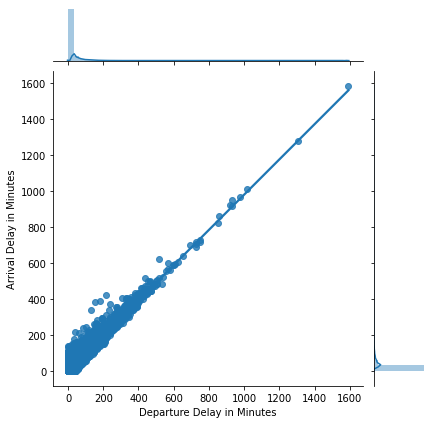

In [17]:
sns.jointplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = df, kind = 'reg')
plt.show()

## 2.3 Data preparation

In [18]:
# copy of train set
train_set_c = train_set.copy()

### Filling in missing data

In this dataset there are some missing values in column "Arrival Delay in Minutes".

In [19]:
train_set_c['Arrival Delay in Minutes'].describe()

count    82872.000000
mean        15.210023
std         38.980639
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1584.000000
Name: Arrival Delay in Minutes, dtype: float64

Based on the previous analysis, I noticed a linear relationship between the Arrival Delay and Departure Delay variables. I decided to calculate the formula for this relationship using linear regression:

In [20]:
x = train_set_c[train_set_c['Arrival Delay in Minutes'].isna() == False][['Departure Delay in Minutes']]
y = train_set_c[train_set_c['Arrival Delay in Minutes'].isna() == False][['Arrival Delay in Minutes']]
y.isna().sum()

Arrival Delay in Minutes    0
dtype: int64

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [22]:
# slope factor
reg.coef_

array([[0.98102626]])

In [23]:
# intercept
reg.intercept_

array([0.71338045])

According to the above data, the formula is:

$ArrivalDelay = 0.98102626 * DepartureDelay + 0.71338045$

Filling in the missing values according to this formula:

In [24]:
train_set_c['Arrival Delay in Minutes'].fillna(reg.coef_[0] * train_set_c['Departure Delay in Minutes'] + reg.intercept_, inplace = True)

In [25]:
# checking if there are no missing values
train_set_c['Arrival Delay in Minutes'].isna().sum()

0

In [26]:
train_set_c['Arrival Delay in Minutes'].describe()

count    83123.000000
mean        15.283195
std         39.081638
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1584.000000
Name: Arrival Delay in Minutes, dtype: float64

### Preprocessoring 

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

# list of categorical columns
categorical = ['Gender','Customer Type', 'Type of Travel', 'Class', 'satisfaction']
num = train_set_c.drop(categorical, axis = 1)
# list of numeric columns
numeric = list(num) 

# transformation of the dataset
# scaling numeric values
# encoding categorical features as an integer array
transformer = ColumnTransformer([
    ('num', MinMaxScaler(), numeric),
    ('cat', OrdinalEncoder(), categorical),
    ])

passangers = transformer.fit_transform(train_set_c)
mms = MinMaxScaler()

# transforming to DataFrame with column names
data_train = pd.DataFrame(passangers, columns=numeric + categorical)
# scaling 'Class' attribute  because it contains values: 0,1,2
data_train['Class'] = mms.fit_transform(data_train[['Class']])

In [28]:
data_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
0,0.666667,0.204968,0.8,1.0,0.8,0.2,1.0,0.8,1.0,0.4,...,1.0,0.4,0.8,0.007538,0.001894,0.0,0.0,1.0,0.5,0.0
1,0.423077,0.145598,0.8,0.8,0.8,0.4,0.2,0.8,1.0,0.2,...,0.6,1.0,0.2,0.011935,0.018308,0.0,1.0,0.0,0.0,0.0
2,0.743590,0.071082,0.4,0.6,0.4,0.2,0.2,0.4,0.2,0.2,...,1.0,1.0,0.2,0.000000,0.000000,1.0,0.0,1.0,0.5,0.0
3,0.807692,0.445880,0.6,1.0,0.6,0.8,0.6,1.0,0.8,1.0,...,0.6,1.0,1.0,0.000000,0.000000,0.0,0.0,1.0,0.5,0.0
4,0.230769,0.267973,0.4,0.4,0.4,0.6,0.2,0.4,0.2,0.2,...,1.0,0.4,0.2,0.001884,0.009470,0.0,1.0,0.0,0.5,0.0


### Separation of labels from attributes

Separating the label - "satisfaction" from other attributes.

In [29]:
X_train = data_train.drop('satisfaction', axis = 1)
y_train = data_train['satisfaction']

### The second version of the database

The second version of the data will differ from the first by performing a PCA explaining 95% of the variance.

In [30]:
from sklearn.decomposition import PCA

# PCA, explaining 95% of the variance

pca95 = PCA(n_components=0.95, random_state=42)
X_train_pca = pca95.fit_transform(X_train)

print('Number of components: ', pca95.n_components_)

print('Individual components explain % of variance: ')
print(pca95.explained_variance_ratio_)

print('The selected number of components explains {}% of the variance.'.format(round(sum(pca95.explained_variance_ratio_ * 100),2)))
print('Cumulative % of variance explained by successive components:' ,
      np.cumsum(pca95.explained_variance_ratio_ * 100))

Number of components:  16
Individual components explain % of variance: 
[0.17919911 0.14388584 0.13770156 0.09916625 0.08799489 0.07557996
 0.03910513 0.03747813 0.02722817 0.02649513 0.02110694 0.02021313
 0.01900551 0.0161894  0.01495762 0.01301544]
The selected number of components explains 95.83% of the variance.
Cumulative % of variance explained by successive components: [17.9199109  32.30849498 46.07865117 55.99527588 64.79476456 72.35276047
 76.26327328 80.01108598 82.73390257 85.38341543 87.49410908 89.51542215
 91.41597344 93.03491371 94.53067594 95.83222004]


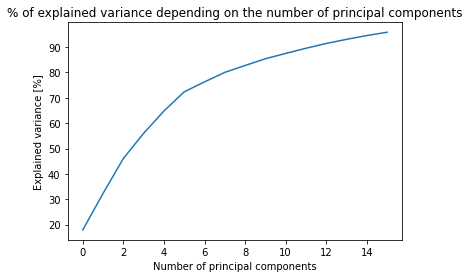

In [31]:
# Representation in the chart
plt.figure()
plt.plot(np.cumsum(pca95.explained_variance_ratio_ * 100))
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance [%]')
plt.title('% of explained variance depending on the number of principal components')
plt.show()

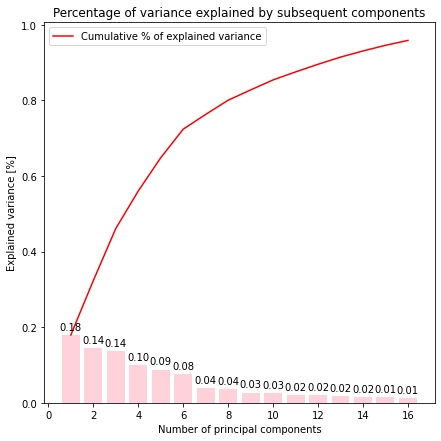

In [32]:
plt.figure(figsize = (7,7))
plots = plt.bar(
    range(1,len(pca95.explained_variance_)+1),
    pca95.explained_variance_ratio_,
    color='pink', alpha = 0.7
    )
 
plt.plot(
    range(1,len(pca95.explained_variance_ )+1),
    np.cumsum(pca95.explained_variance_ratio_),
    c='red',
    label='Cumulative % of explained variance')

for bar in plots:
    plt.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
plt.legend(loc='best')
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance [%]')
plt.title('Percentage of variance explained by subsequent components')
plt.show()

### Visualisation and Alaysis of training set

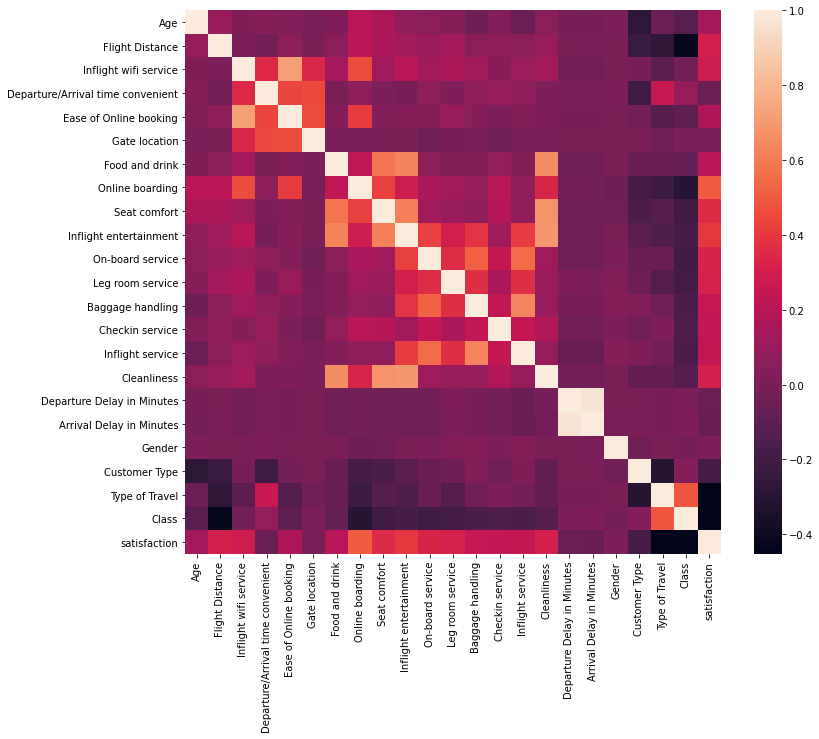

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(data_train.corr())
plt.show()

In [34]:
data_train.corr()['satisfaction'].sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503269
Inflight entertainment               0.396520
Seat comfort                         0.349035
On-board service                     0.322308
Leg room service                     0.311918
Cleanliness                          0.303724
Flight Distance                      0.299090
Inflight wifi service                0.282104
Baggage handling                     0.246778
Inflight service                     0.243859
Checkin service                      0.235985
Food and drink                       0.209592
Ease of Online booking               0.170423
Age                                  0.136607
Gender                               0.012337
Gate location                        0.000248
Departure/Arrival time convenient   -0.050427
Departure Delay in Minutes          -0.051657
Arrival Delay in Minutes            -0.058726
Customer Type                       -0.186588
Type of Travel                    

It can be observed that the greatest impact on passenger satisfaction with the flight is: online boarding, class, type of travel and inflight entertainment.

Interestingly, the delay does not have a big impact on passenger satisfaction.

## 2.4 Model selection and training

### 2.4.1 Dataset without PCA

In [35]:
# filling in missing values
test_set['Arrival Delay in Minutes'].fillna(test_set['Arrival Delay in Minutes'].median(axis = 0), inplace= True)

# scaling and converting to numeric variables
passangers2 = transformer.fit_transform(test_set)
data_test = pd.DataFrame(passangers2, columns=numeric + categorical)

# separation of labels from attributes
X_test = data_test.drop('satisfaction', axis = 1)
y_test = data_test['satisfaction']

#### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy:  0.9280592849237284


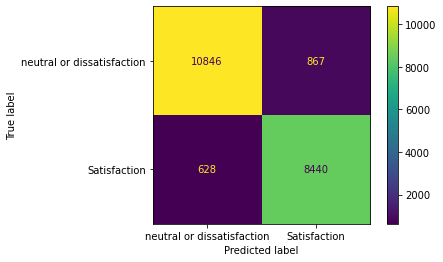

In [98]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
dtree_score = dtree.score(X_test, y_test)
print('Accuracy: ', dtree_score)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtree.predict(X_test), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

In [99]:
dtree.get_depth()

37

In [103]:
dtree.get_n_leaves()

3217

Because the depth of the tree is large and there are thousands of leaves, it's difficult to show it on the chart, I will also check the model with cut branches.

**Grid Search**

Searching the best parameter of smaller depth and best criteria.

In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion' : ["gini", "entropy", "log_loss"],
             "max_depth" : [3,5,7,10,15]}

grid_search_tree = GridSearchCV(dtree, param_grid)
grid_search_tree.fit(X_train, y_train)
print('Best parameters: ', grid_search_tree.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 15}


Of course, the best depth shown by gridsearch is the largest value we have given for the search. Accuracy for tree with depth 15:

In [101]:
grid_search_tree.best_score_

0.952299655539233

Checking accuracy of other parameters:

In [41]:
cvres = grid_search_tree.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8849296511249249 {'criterion': 'gini', 'max_depth': 3}
0.9058865363601496 {'criterion': 'gini', 'max_depth': 5}
0.9293817956826619 {'criterion': 'gini', 'max_depth': 7}
0.9444318264380875 {'criterion': 'gini', 'max_depth': 10}
0.9502785095558917 {'criterion': 'gini', 'max_depth': 15}
0.8851582225534964 {'criterion': 'entropy', 'max_depth': 3}
0.9059827552519412 {'criterion': 'entropy', 'max_depth': 5}
0.9297065939632526 {'criterion': 'entropy', 'max_depth': 7}
0.9465731942946876 {'criterion': 'entropy', 'max_depth': 10}
0.9521312352102586 {'criterion': 'entropy', 'max_depth': 15}
0.8851582225534964 {'criterion': 'log_loss', 'max_depth': 3}
0.9059827552519412 {'criterion': 'log_loss', 'max_depth': 5}
0.9297186240384405 {'criterion': 'log_loss', 'max_depth': 7}
0.9467897392663565 {'criterion': 'log_loss', 'max_depth': 10}
0.9522034091484727 {'criterion': 'log_loss', 'max_depth': 15}


The difference between the criteria is negligible, so I decided to use the default - gini.

Cause difference of accuracy between model with 7, 10 and 15 depth of tree was small, I decide to check simpler models:

Accuracy:  0.9370578894182185


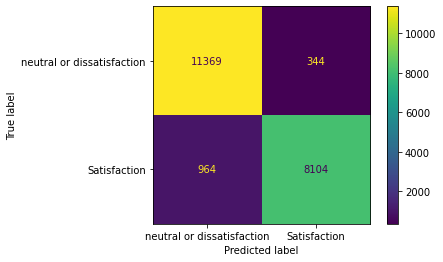

In [102]:
dtree_10 = DecisionTreeClassifier(max_depth=10)
dtree_10.fit(X_train, y_train)
dtree_10_score = dtree_10.score(X_test, y_test)
print('Accuracy: ', dtree_10_score)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtree_10.predict(X_test), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

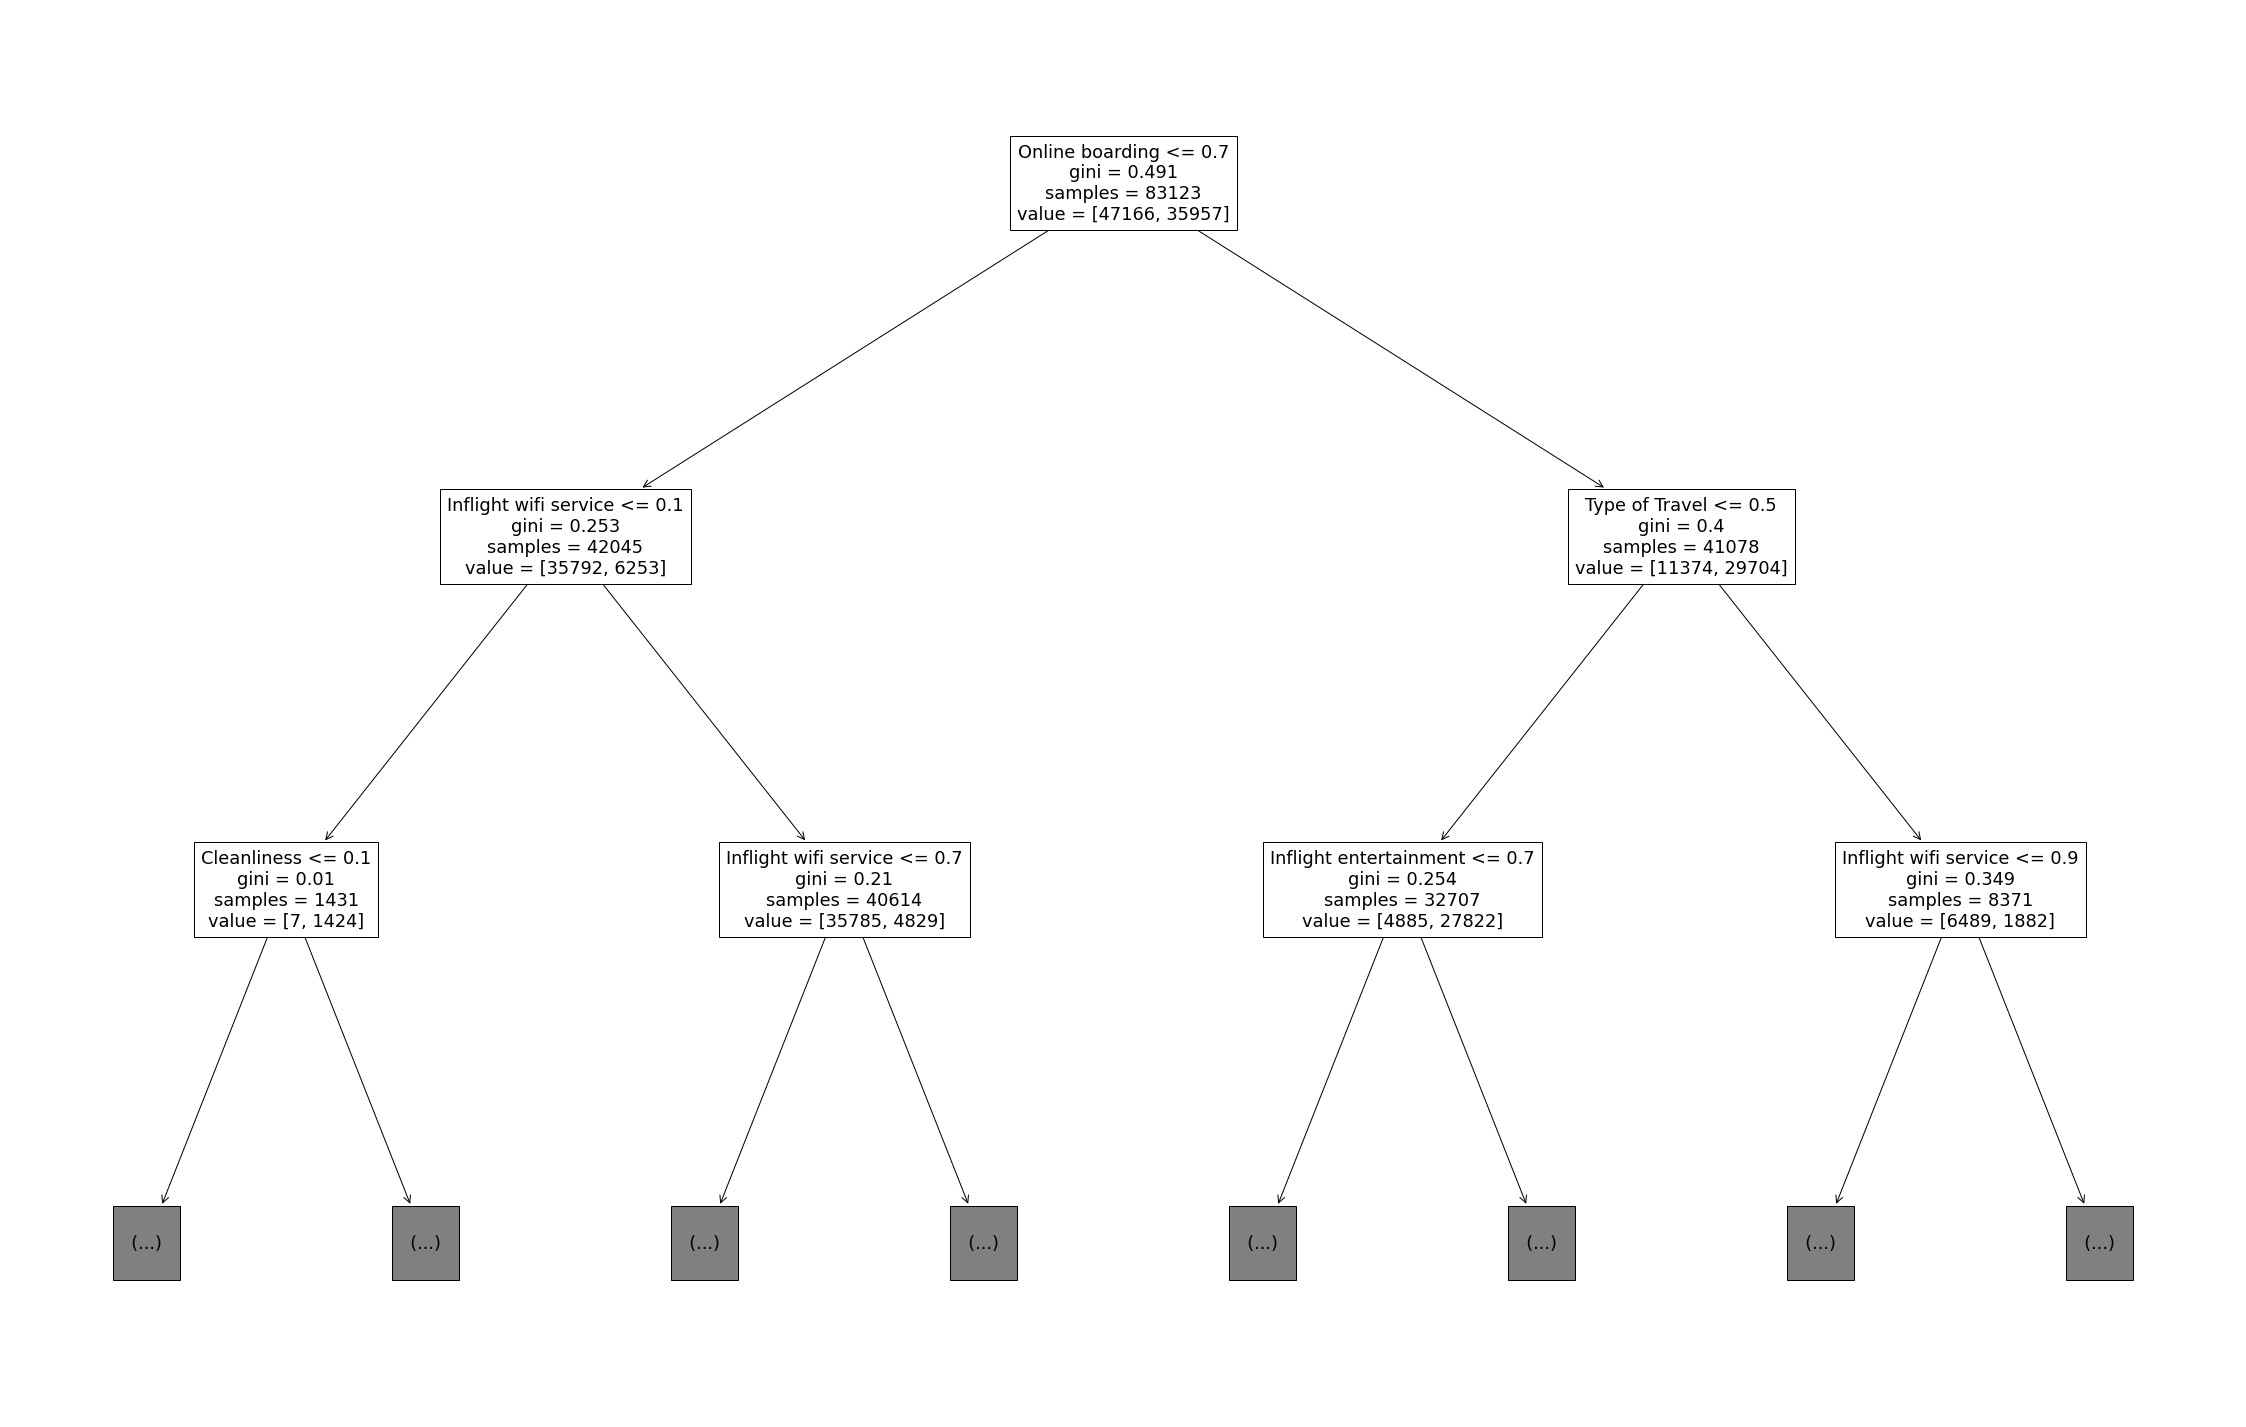

In [93]:
from sklearn import tree
plt.figure(figsize = (40,26))
tree.plot_tree(dtree_10, max_depth=2, feature_names=list(X_train))
plt.show()

A tree with a depth of 10 turned out to be a better classifier than a full one. We can assume that the whole tree was overflowed - it fitted too finely to the training data, losing the overall ability to generalize to new data.

Tree with depth 7:

Accuracy:  0.9308021750637602


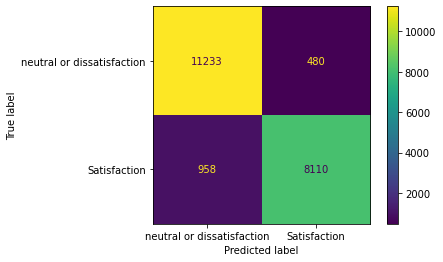

In [105]:
dtree_7 = DecisionTreeClassifier(max_depth=7)
dtree_7.fit(X_train, y_train)
dtree_7_score = dtree_7.score(X_test, y_test)
print('Accuracy: ', dtree_7_score)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtree_7.predict(X_test), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

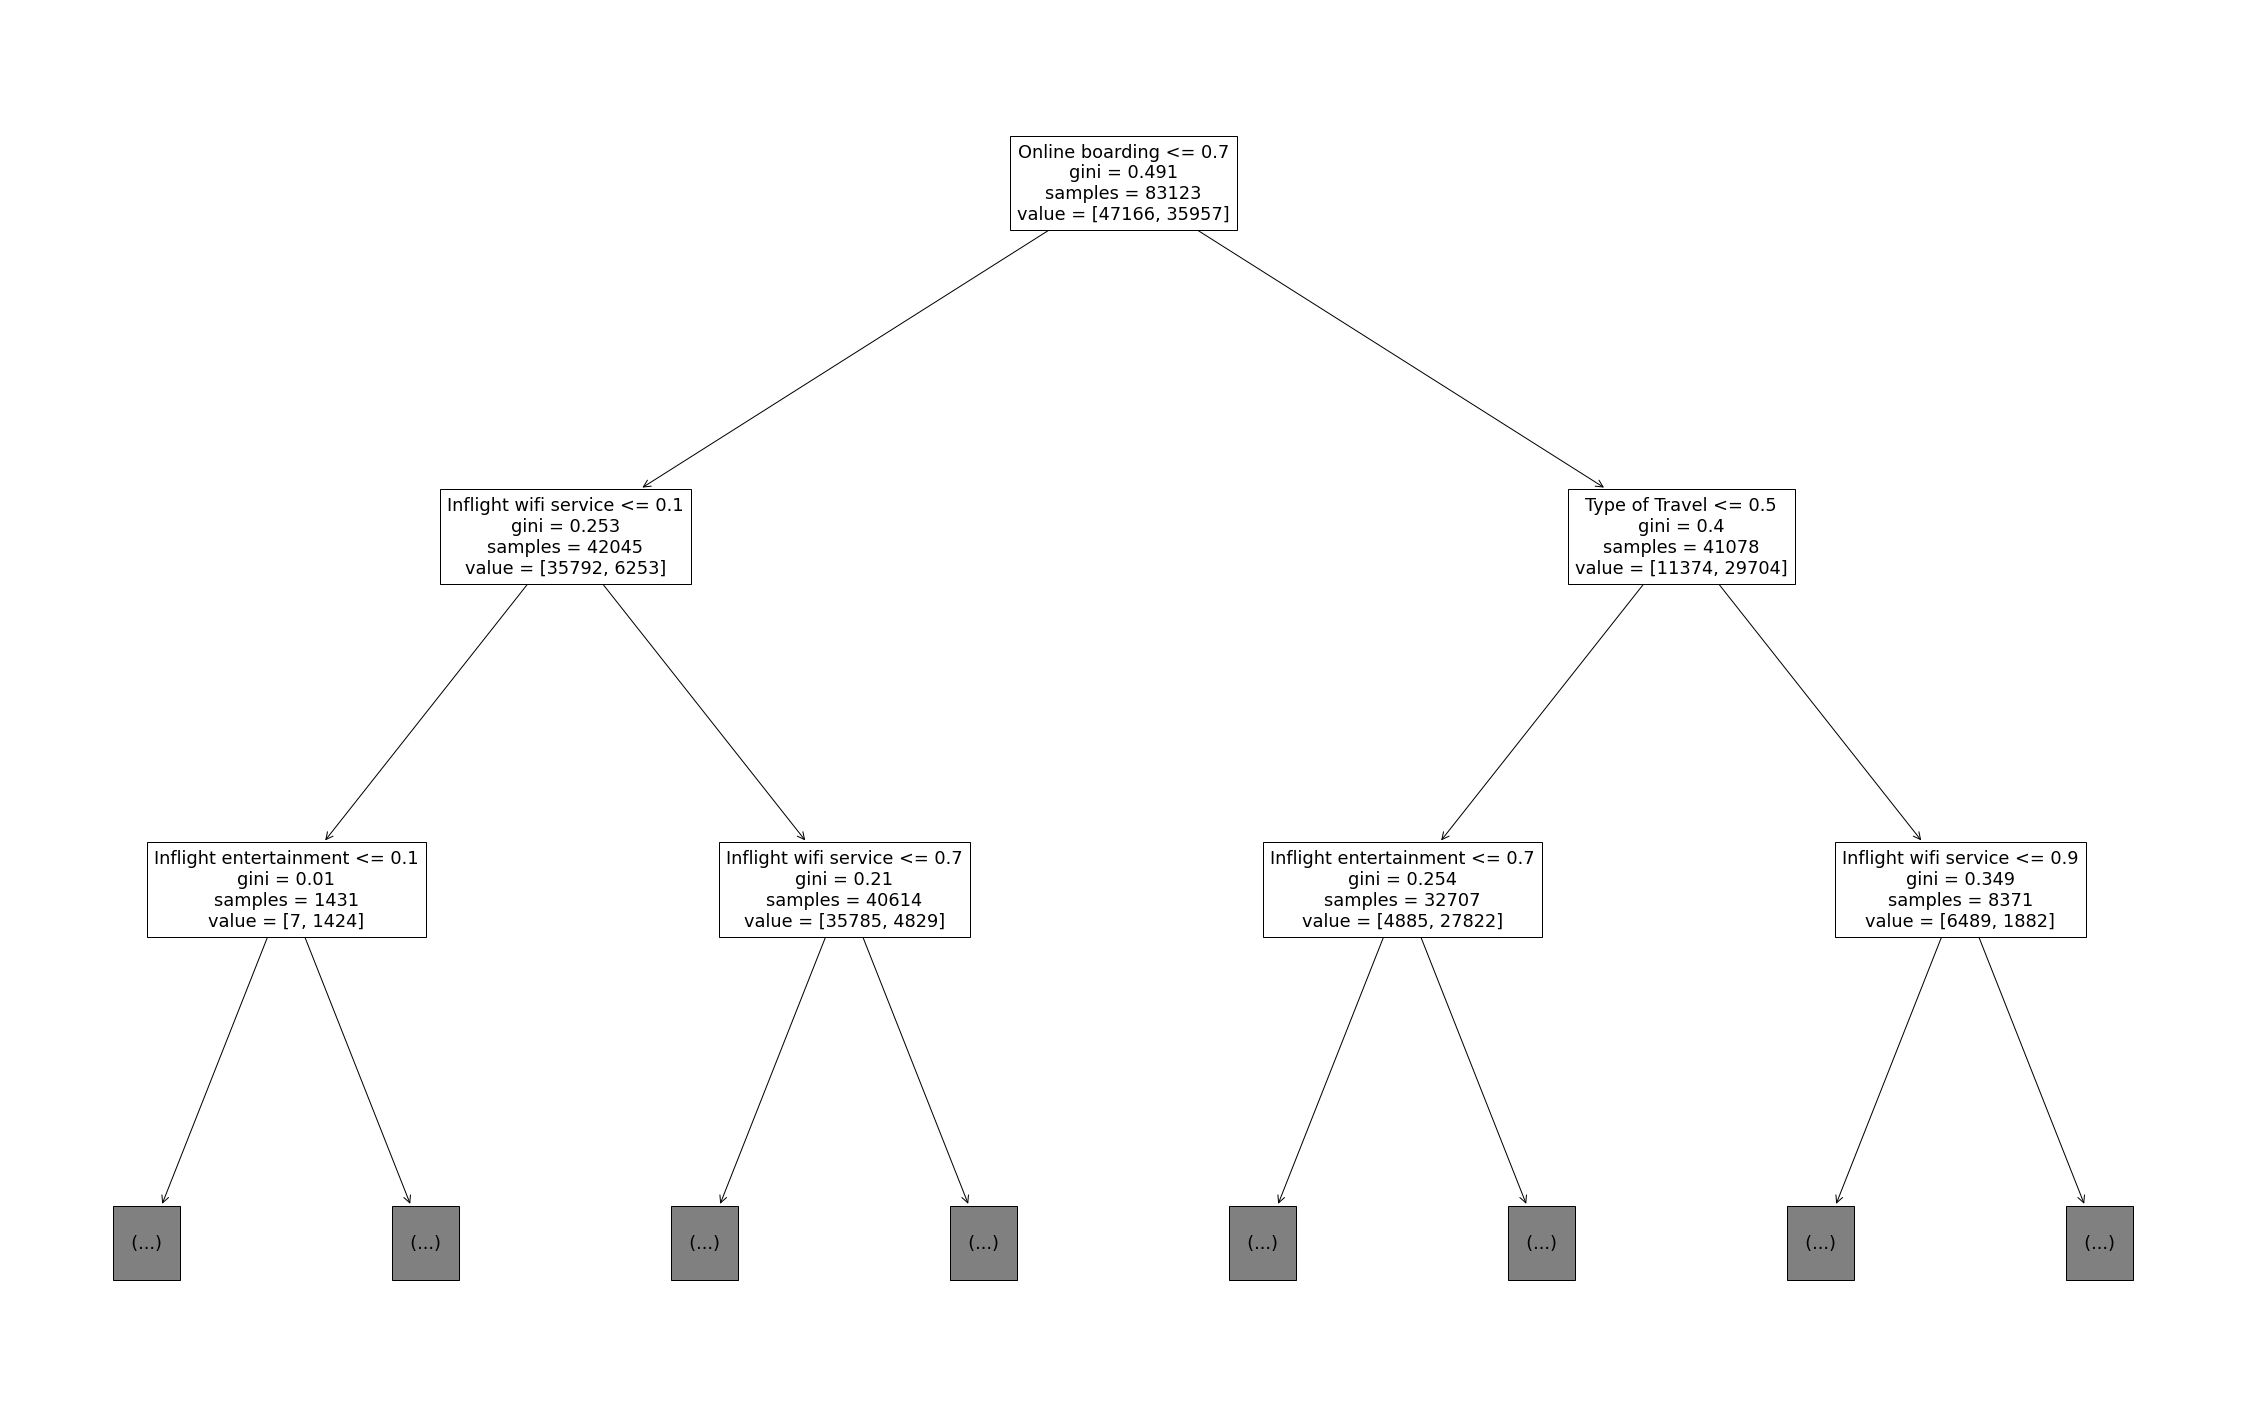

In [106]:
plt.figure(figsize = (40,26))
tree.plot_tree(dtree_7, max_depth=2, feature_names=list(X_train))
plt.show()

The difference between these 3 models is small, so a depth of 7 is enough to get good predictions.

#### Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
 
bayes = GaussianNB()
bayes.fit(X_train, y_train)
print('Accuracy: ', bayes.score(X_test, y_test))
bayes_score = bayes.score(X_test, y_test)

Accuracy:  0.8421153938693999


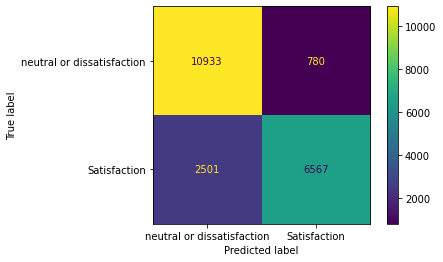

In [43]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, bayes.predict(X_test), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

The model has worse accuracy than the decision tree model.

#### kNN

**Searching the best number of neighbors**:

Text(0, 0.5, 'Error Rate')

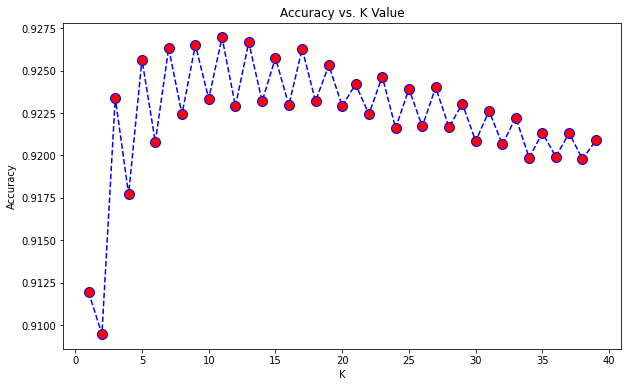

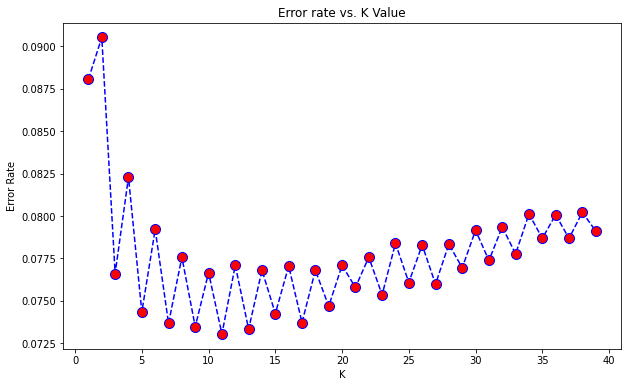

In [160]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
error_rate = []
e_r = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    e_r.append(knn.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),e_r,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the graph above, we can see that the model with 5, 7 or 9 neighbors has the highest accuracy.

In [161]:
list(enumerate(e_r,start = 1))

[(1, 0.9119387902410856),
 (2, 0.9094846253789519),
 (3, 0.9233915595977095),
 (4, 0.9177132957990473),
 (5, 0.9256532409412445),
 (6, 0.9207930320966268),
 (7, 0.92632693325634),
 (8, 0.9224291420047158),
 (9, 0.9265194167749387),
 (10, 0.9233434387180598),
 (11, 0.9269525046917858),
 (12, 0.9229103508012126),
 (13, 0.9266637794138877),
 (14, 0.9231990760791108),
 (15, 0.9257494827005438),
 (16, 0.9229584716808623),
 (17, 0.9262788123766903),
 (18, 0.9231990760791108),
 (19, 0.9253163947836966),
 (20, 0.9229103508012126),
 (21, 0.924209614551754),
 (22, 0.9224291420047158),
 (23, 0.9246427024686011),
 (24, 0.9216110870506713),
 (25, 0.923920889273856),
 (26, 0.9217073288099706),
 (27, 0.9240171310331553),
 (28, 0.921659207930321),
 (29, 0.9230547134401617),
 (30, 0.9208411529762764),
 (31, 0.9226216255233146),
 (32, 0.9206486694576776),
 (33, 0.9222366584861171),
 (34, 0.9198787353832828),
 (35, 0.9213223617727732),
 (36, 0.9199268562629325),
 (37, 0.9213223617727732),
 (38, 0.9197824

Model with 5 neighbors:

Accuracy:  0.949183739759152


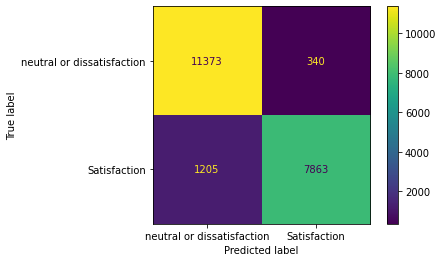

In [45]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)

knn5_score = knn5.score(X_train, y_train)
print('Accuracy: ', knn5.score(X_train, y_train))

cm = ConfusionMatrixDisplay(confusion_matrix(y_test, knn5.predict(X_test), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

The model has good accuracy, but it makes mistakes in the classification of satisfied passengers.

Model with 7 neigbors:

Accuracy:  0.9434572861903444


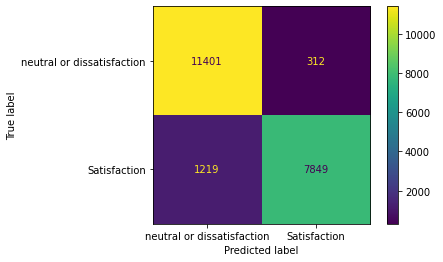

In [46]:
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train,y_train)

knn7_score = knn7.score(X_train, y_train)
print('Accuracy: ', knn7.score(X_train, y_train))

cm = ConfusionMatrixDisplay(confusion_matrix(y_test, knn7.predict(X_test), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

The accuracy is slightly worse than the previous model, but more neutral or dissatisfied passenger samples were well classified and more satisfied passenger samples were misclassified.

Model with 9 neighbors:

Accuracy:  0.9403414217484932


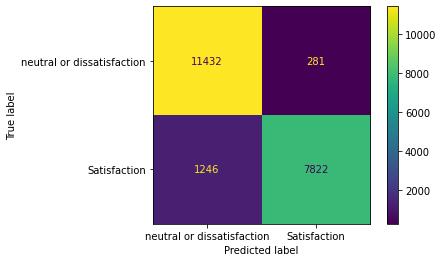

In [47]:
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train,y_train)

knn9_score = knn9.score(X_train, y_train)
print('Accuracy: ', knn9.score(X_train, y_train))

cm = ConfusionMatrixDisplay(confusion_matrix(y_test, knn9.predict(X_test), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

We can observe that with increasing value of neighbors more samples of neutral or dissatisfied passengers are well-classified and model makes more mistakes with classification of satisfied passengers. In conclusion, the best choice to avoid overfitting is parametr of 5 neighbors.

####  MLPClassifier

In [48]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3,3), max_iter=5000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=5000)

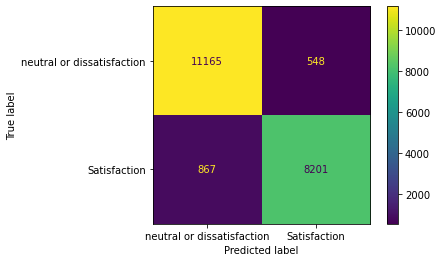

In [49]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, mlp.predict(X_test), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

In [50]:
mlp_score = mlp.score(X_test, y_test)
print('Accuracy: ', mlp_score)

Accuracy:  0.9319089552957028


**More neurons in hidden layers**

Accuracy:  0.9460564939127087


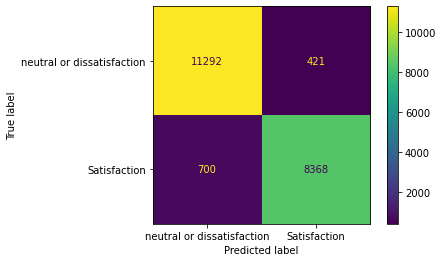

In [183]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10,6), max_iter=5000)
mlp2.fit(X_train, y_train)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, mlp2.predict(X_test), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()
mlp2_score = mlp2.score(X_test, y_test)
print('Accuracy: ', mlp2_score)

Accuracy has improved.

#### Neural Networks with keras

#### Simple network with one hidden layer(10)

In [193]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

model1 = Sequential()
model1.add(Dense(10, input_dim = 22, activation = 'relu'))
model1.add(Dense(1, activation='sigmoid' ))

model1.summary()

# to avoid overfitting
# stopping model if the value of the function does not improve for the next 3 epochs.
es_callback = EarlyStopping(monitor='val_loss', patience=3)

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=50, callbacks=[es_callback])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                230       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2598/2598 [==============================] - 11s 4ms/step - loss: 0.3816 - accuracy: 0.8411 - val_loss: 0.3590 - val_accuracy: 0.8636
Epoch 2/50
2598/2598 [==============================] - 10s 4ms/step - loss: 0.2969 - accuracy: 0.8862 - val_loss: 0.2848 - val_accuracy: 0.8900
Epoch 3/50
2598/2598 [==============================] - 8s 3ms/step - loss: 0.2430 - accuracy: 0.9049 - val_loss: 0.2499 - val_accuracy: 0.9023
Epoch 4/50
2598/25

In [196]:
accuracy1 = model1.evaluate(X_test, y_test)[1]
print('Accuracy: ',accuracy1)

650/650 [==============================] - 1s 1ms/step - loss: 0.1788 - accuracy: 0.9283
Accuracy:  0.9283480048179626


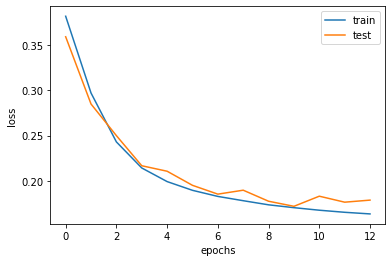

In [197]:
plt.plot(history1.history['loss'], label = 'train')
plt.plot(history1.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Model with 2 hidden layers(10,6)**

In [199]:
model = Sequential()
model.add(Dense(10, input_dim = 22, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation='sigmoid' ))

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=50, callbacks=[es_callback])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                230       
                                                                 
 dense_19 (Dense)            (None, 6)                 66        
                                                                 
 dense_20 (Dense)            (None, 1)                 7         
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2598/2598 [==============================] - 5s 2ms/step - loss: 0.3675 - accuracy: 0.8518 - val_loss: 0.3455 - val_accuracy: 0.8681
Epoch 2/50
2598/2598 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.8980 - val_loss: 0.2507 - val_accuracy: 0.9053
Epoch 3/50
2598/2598 [==========

In [201]:
accuracy2 = model.evaluate(X_test, y_test)[1]
print('Accuracy: ',accuracy2)

650/650 [==============================] - 1s 1ms/step - loss: 0.1952 - accuracy: 0.9253
Accuracy:  0.925268292427063


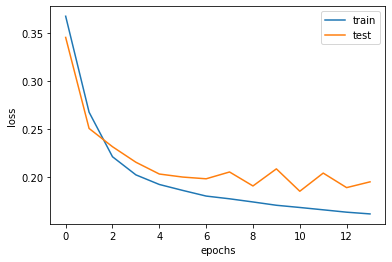

In [200]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Current model has worse accuracy than model with one hidden layer.

**Model with more neurons in hidden layer(15)**

In [202]:
model11 = Sequential()
model11.add(Dense(15, input_dim = 22, activation = 'relu'))
model11.add(Dense(1, activation='sigmoid' ))

model11.summary()

# to avoid overfitting
# stopping model if the value of the function does not improve for the next 3 epochs.
es_callback = EarlyStopping(monitor='val_loss', patience=3)

model11.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history11 = model11.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=50, callbacks=[es_callback])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 15)                345       
                                                                 
 dense_22 (Dense)            (None, 1)                 16        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2598/2598 [==============================] - 5s 2ms/step - loss: 0.3824 - accuracy: 0.8421 - val_loss: 0.3353 - val_accuracy: 0.8651
Epoch 2/50
2598/2598 [==============================] - 4s 1ms/step - loss: 0.2707 - accuracy: 0.8929 - val_loss: 0.2372 - val_accuracy: 0.9058
Epoch 3/50
2598/2598 [==============================] - 4s 1ms/step - loss: 0.2040 - accuracy: 0.9202 - val_loss: 0.1918 - val_accuracy: 0.9238
Epoch 4/50
2598/2598

In [203]:
accuracy11 = model11.evaluate(X_test, y_test)[1]
print('Accuracy: ',accuracy11)

650/650 [==============================] - 1s 1ms/step - loss: 0.1397 - accuracy: 0.9428
Accuracy:  0.9428324103355408


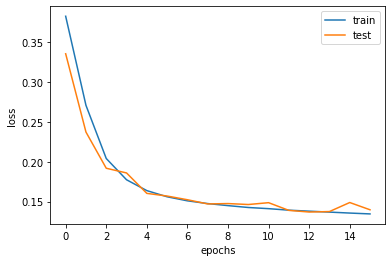

In [206]:
plt.plot(history11.history['loss'], label = 'train')
plt.plot(history11.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Accuracy has improved.

**More neuron with hidden layer(20)**

In [204]:
model12 = Sequential()
model12.add(Dense(20, input_dim = 22, activation = 'relu'))
model12.add(Dense(1, activation='sigmoid' ))

model12.summary()


model12.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history12 = model12.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=50, callbacks=[es_callback])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 20)                460       
                                                                 
 dense_24 (Dense)            (None, 1)                 21        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2598/2598 [==============================] - 5s 2ms/step - loss: 0.3454 - accuracy: 0.8639 - val_loss: 0.2816 - val_accuracy: 0.8918
Epoch 2/50
2598/2598 [==============================] - 5s 2ms/step - loss: 0.2315 - accuracy: 0.9105 - val_loss: 0.2148 - val_accuracy: 0.9154
Epoch 3/50
2598/2598 [==============================] - 6s 2ms/step - loss: 0.1932 - accuracy: 0.9237 - val_loss: 0.1967 - val_accuracy: 0.9217
Epoch 4/50
2598/259

In [207]:
accuracy12 = model12.evaluate(X_test, y_test)[1]
print('Accuracy: ',accuracy12)

650/650 [==============================] - 1s 1ms/step - loss: 0.1790 - accuracy: 0.9328
Accuracy:  0.9327751398086548


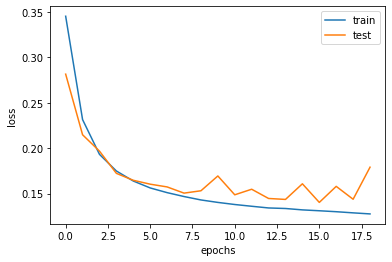

In [208]:
plt.plot(history12.history['loss'], label = 'train')
plt.plot(history12.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Accuracy is worse than in model with 15 neurons in hidden layer.

**different activation function in model with one hidden layer(15)**

In [210]:
model13 = Sequential()
model13.add(Dense(15, input_dim = 22, activation = 'sigmoid'))
model13.add(Dense(1, activation='sigmoid' ))

model13.summary()


model13.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history13 = model13.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=50, callbacks=[es_callback])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 15)                345       
                                                                 
 dense_28 (Dense)            (None, 1)                 16        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2598/2598 [==============================] - 5s 2ms/step - loss: 0.4463 - accuracy: 0.8140 - val_loss: 0.3810 - val_accuracy: 0.8529
Epoch 2/50
2598/2598 [==============================] - 8s 3ms/step - loss: 0.3456 - accuracy: 0.8680 - val_loss: 0.3696 - val_accuracy: 0.8642
Epoch 3/50
2598/2598 [==============================] - 7s 3ms/step - loss: 0.3363 - accuracy: 0.8716 - val_loss: 0.3618 - val_accuracy: 0.8665
Epoch 4/50
2598/259

In [211]:
accuracy13 = model13.evaluate(X_test, y_test)[1]
print('Accuracy: ',accuracy13)

650/650 [==============================] - 1s 2ms/step - loss: 0.1756 - accuracy: 0.9319
Accuracy:  0.9319089651107788


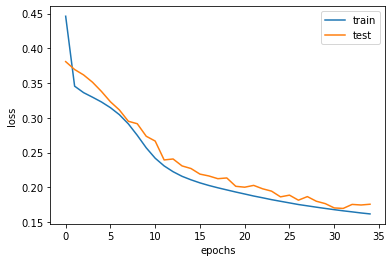

In [212]:
plt.plot(history13.history['loss'], label = 'train')
plt.plot(history13.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

The model is slightly worse than model using the relu activation function.

In [222]:
print('relu: ', accuracy11, 'sigmoid: ', accuracy13)

relu:  0.9428324103355408 sigmoid:  0.9319089651107788


The best network is with one hidden layer with 15 neurons and relu as activation function.

### 2.4.2 Dataset with PCA

In [53]:
X_test_pca = pca95.transform(X_test)

#### Decision Tree

In [129]:
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train_pca, y_train)
dtree2_score = dtree2.score(X_test_pca, y_test)
print(dtree2_score)

0.8557336028102593


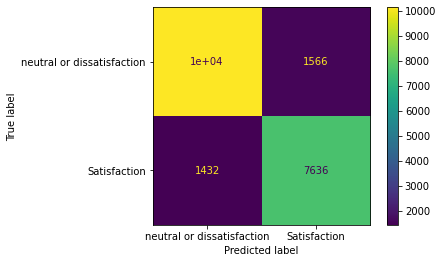

In [133]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtree2.predict(X_test_pca), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

In [148]:
dtree2.get_depth()

46

In [149]:
dtree2.get_n_leaves()

4856

This time the tree is even bigger.

**tree with cut branches**

In [142]:
param_grid = {'criterion' : ["gini", "entropy", "log_loss"],
             "max_depth" : [1,3,5,7,9,10,12,15]}

grid_search_tree2 = GridSearchCV(dtree2, param_grid)
grid_search_tree2.fit(X_train_pca, y_train)
print('Best parameters: ', grid_search_tree2.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 12}


In [143]:
cvres2 = grid_search_tree2.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(mean_score, params)

0.8355449441698568 {'criterion': 'gini', 'max_depth': 1}
0.859353060707592 {'criterion': 'gini', 'max_depth': 3}
0.8735128051119135 {'criterion': 'gini', 'max_depth': 5}
0.8875402063869974 {'criterion': 'gini', 'max_depth': 7}
0.8974051046769956 {'criterion': 'gini', 'max_depth': 9}
0.9006292538371916 {'criterion': 'gini', 'max_depth': 10}
0.9039496341913493 {'criterion': 'gini', 'max_depth': 12}
0.9028548481405633 {'criterion': 'gini', 'max_depth': 15}
0.8356652521583072 {'criterion': 'entropy', 'max_depth': 1}
0.8529769522458697 {'criterion': 'entropy', 'max_depth': 3}
0.875076787252057 {'criterion': 'entropy', 'max_depth': 5}
0.8893086578332259 {'criterion': 'entropy', 'max_depth': 7}
0.8987163741885995 {'criterion': 'entropy', 'max_depth': 9}
0.9017720870993653 {'criterion': 'entropy', 'max_depth': 10}
0.9036247946623055 {'criterion': 'entropy', 'max_depth': 12}
0.9010863757082793 {'criterion': 'entropy', 'max_depth': 15}
0.8356652521583072 {'criterion': 'log_loss', 'max_depth': 1}

The difference between the criteria is negligible, so I decided to use the default - gini again.

I will check accuracy for test data with models with 7,9,10 and 12 depth.

Accuracy:  0.8773879986526154


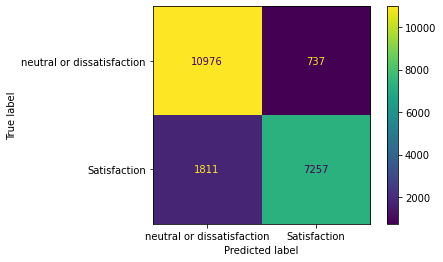

In [146]:
dtree_7_2 = DecisionTreeClassifier(max_depth=7)
dtree_7_2.fit(X_train_pca, y_train)
dtree_7_score2 = dtree_7_2.score(X_test_pca, y_test)
print('Accuracy: ', dtree_7_score2)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtree_7_2.predict(X_test_pca), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

As before, we can observe that the full tree is overfitting and already a tree with a depth of 7 achieves better accuracy.

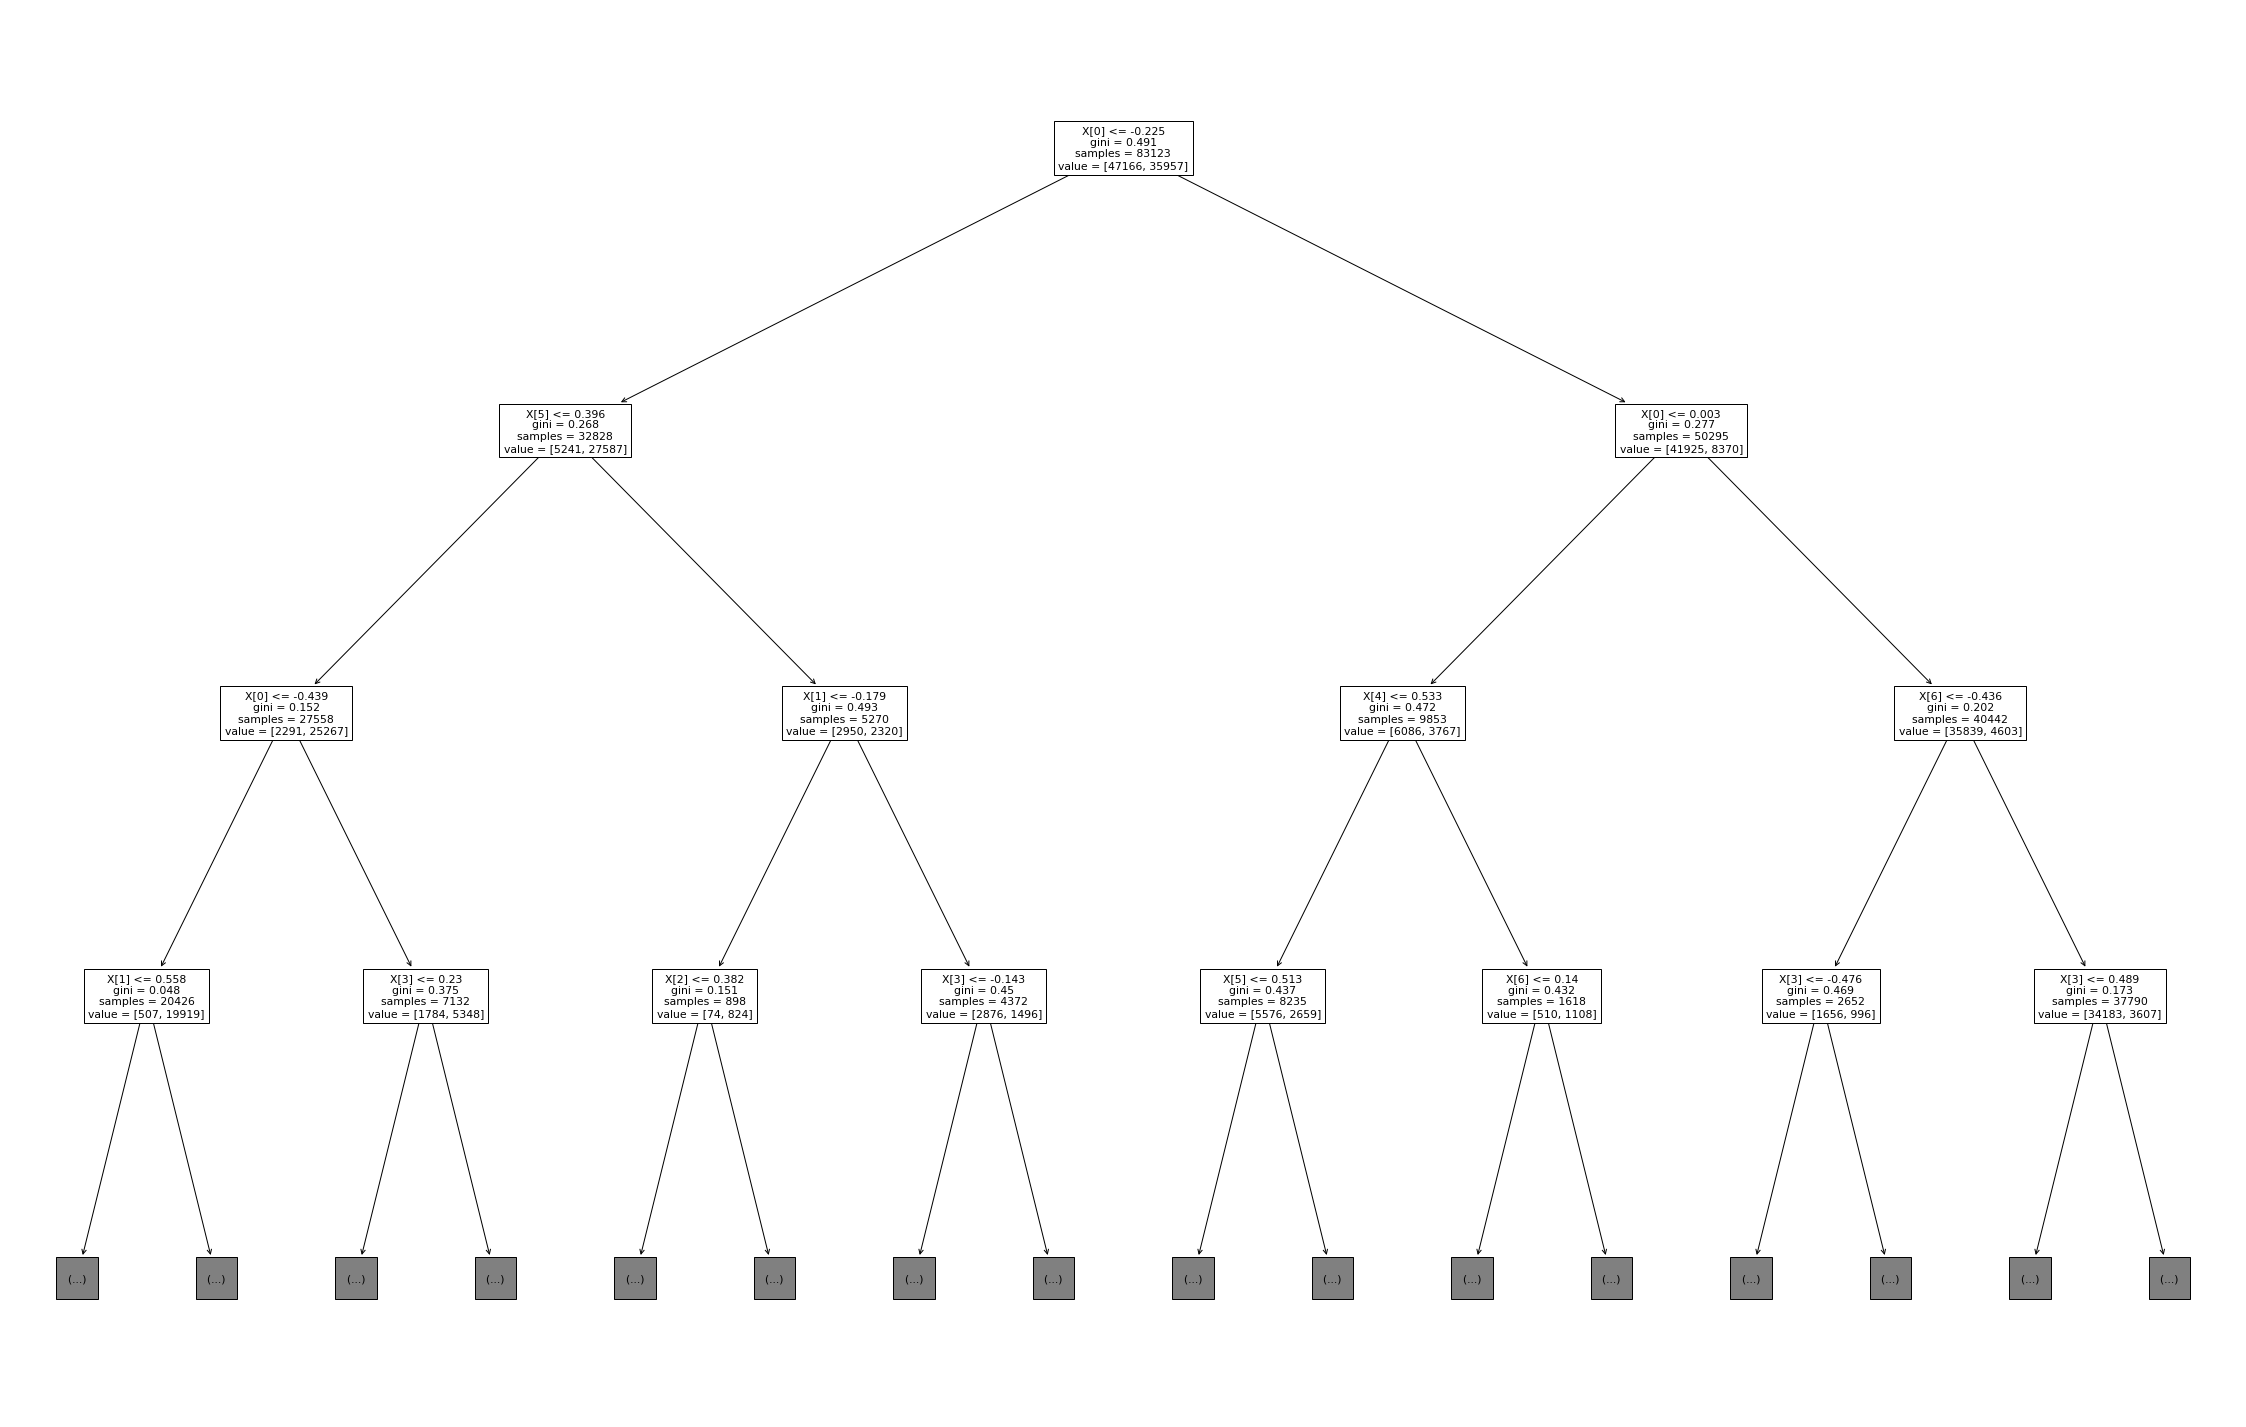

In [147]:
fig1 = plt.figure(figsize = (40,26))
tree.plot_tree(dtree_7_2, max_depth=3)
plt.show()

Accuracy:  0.8826812954140801


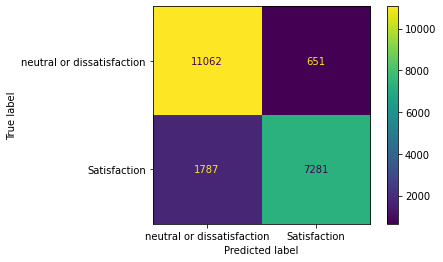

In [145]:
dtree_9_2 = DecisionTreeClassifier(max_depth=9)
dtree_9_2.fit(X_train_pca, y_train)
dtree_9_score2 = dtree_9_2.score(X_test_pca, y_test)
print('Accuracy: ', dtree_9_score2)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtree_9_2.predict(X_test_pca), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

Accuracy:  0.8884558009720418


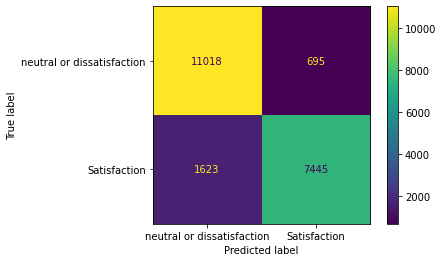

In [141]:
dtree_10_2 = DecisionTreeClassifier(max_depth=10)
dtree_10_2.fit(X_train_pca, y_train)
dtree_10_score2 = dtree_10_2.score(X_test_pca, y_test)
print('Accuracy: ', dtree_10_score2)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtree_10_2.predict(X_test_pca), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

Accuracy:  0.8838361965256725


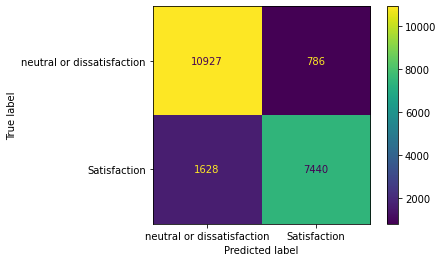

In [144]:
dtree_12_2 = DecisionTreeClassifier(max_depth=12)
dtree_12_2.fit(X_train_pca, y_train)
dtree_12_score2 = dtree_12_2.score(X_test_pca, y_test)
print('Accuracy: ', dtree_12_score2)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtree_12_2.predict(X_test_pca), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

The difference between models with a depth of 7,9,10,12 is negligible. Between models 7-10, the accuracy increases and is greatest at 10, and slightly decreases at 12.

#### Naive Bayes

In [56]:
bayes2 = GaussianNB()
bayes2.fit(X_train_pca, y_train)
print('Accuracy: ', bayes2.score(X_test_pca, y_test))
bayes2_score = bayes2.score(X_test_pca, y_test)

Accuracy:  0.8245512727972667


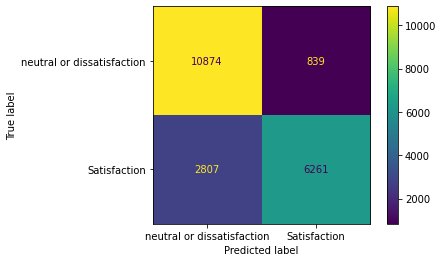

In [57]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, bayes2.predict(X_test_pca), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

The model has worse accuracy than the decision tree model.

#### kNN

In [58]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
print('Accuracy: ', knn3.score(X_test_pca, y_test))

Accuracy:  0.9141042298253212


**Searching the best number of neighbors:**

Text(0, 0.5, 'Error Rate')

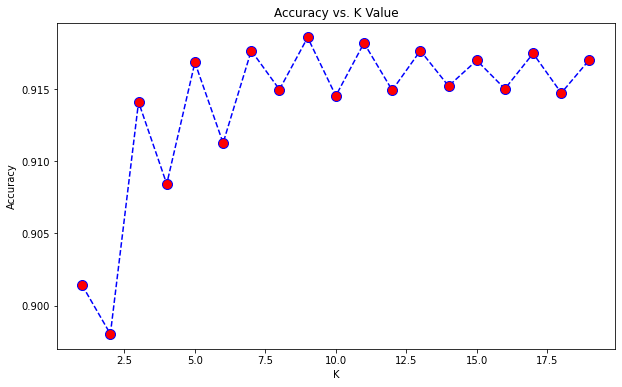

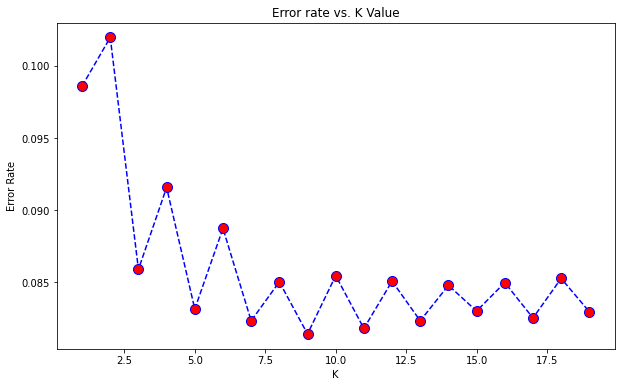

In [60]:
import numpy as np
error_rate = []
e_r = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_pca, y_train)
    pred_i = knn.predict(X_test_pca)
    error_rate.append(np.mean(pred_i != y_test))
    e_r.append(knn.score(X_test_pca, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),e_r,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Based on the chart above, I will consider models with 7, 9 and 15 neighbors as a parameter.

Accuracy:  0.9176651749193975


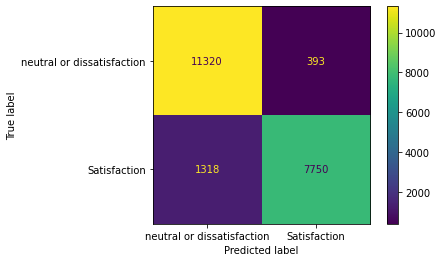

In [61]:
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train_pca,y_train)

print('Accuracy: ', knn7.score(X_test_pca, y_test))
knn7_score2 = knn7.score(X_test_pca, y_test)

cm = ConfusionMatrixDisplay(confusion_matrix(y_test, knn7.predict(X_test_pca), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

Accuracy:  0.9185794716327415


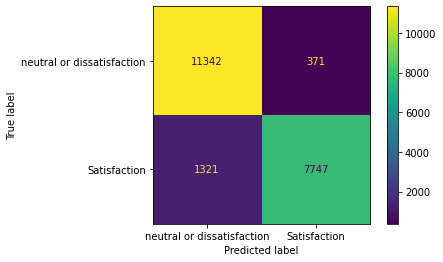

In [156]:
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train_pca,y_train)

print('Accuracy: ', knn9.score(X_test_pca, y_test))
knn9_score2 = knn9.score(X_test_pca, y_test)

cm = ConfusionMatrixDisplay(confusion_matrix(y_test, knn9.predict(X_test_pca), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

Accuracy improved slightly, the model correctly predicted more samples of neutral or dissatisfied passengers than before and less satisfaction passangers.

Accuracy:  0.916991482604302


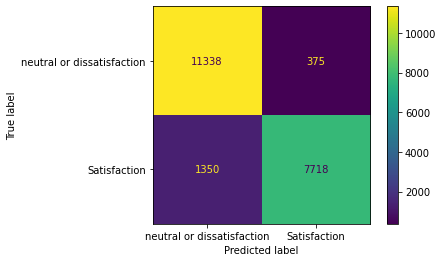

In [62]:
knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_train_pca,y_train)

print('Accuracy: ', knn15.score(X_test_pca, y_test))
knn15_score2 = knn15.score(X_test_pca, y_test)

cm = ConfusionMatrixDisplay(confusion_matrix(y_test, knn15.predict(X_test_pca), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()

Accuracy deteriorated slightly.

Like in dataset without pca we can observe that different in accuracy is almost zero. Best parameter is 9 neighbors.

#### MLPClassifier

Accuracy:  0.9041913286174871


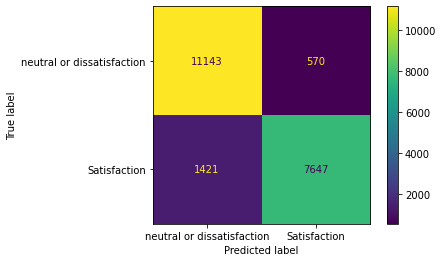

In [239]:
mlp_2 = MLPClassifier(hidden_layer_sizes=(3,3), max_iter=5000)
mlp_2.fit(X_train_pca, y_train)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, mlp_2.predict(X_test_pca), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()
mlp_score2 = mlp_2.score(X_test_pca, y_test)
print('Accuracy: ', mlp_score2)

Accuracy:  0.9340743948799384


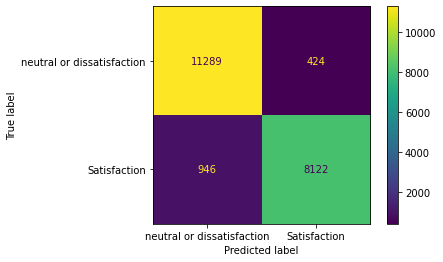

In [240]:
mlp_22 = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=5000)
mlp_22.fit(X_train_pca, y_train)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, mlp_22.predict(X_test_pca), labels = [0, 1]), display_labels=['neutral or dissatisfaction', 'Satisfaction'])
cm.plot()
mlp_score22 = mlp_22.score(X_test_pca, y_test)
print('Accuracy: ', mlp_score22)

Model with 20 and 10 neurons in hidden layers is better.

#### Neural Net with keras

**Network with 1 headen layer(15)**

In [220]:
model_2 = Sequential()
model_2.add(Dense(15, input_dim = 16, activation = 'relu'))
model_2.add(Dense(1, activation='sigmoid' ))

model_2.summary()

model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history_2 = model_2.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test) , epochs=50, callbacks=[es_callback])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 15)                255       
                                                                 
 dense_30 (Dense)            (None, 1)                 16        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2598/2598 [==============================] - 4s 2ms/step - loss: 0.3318 - accuracy: 0.8678 - val_loss: 0.2456 - val_accuracy: 0.9001
Epoch 2/50
2598/2598 [==============================] - 4s 1ms/step - loss: 0.2245 - accuracy: 0.9092 - val_loss: 0.2220 - val_accuracy: 0.9091
Epoch 3/50
2598/2598 [==============================] - 4s 1ms/step - loss: 0.2113 - accuracy: 0.9141 - val_loss: 0.2106 - val_accuracy: 0.9144
Epoch 4/50
2598/259

In [224]:
accuracy2 = model_2.evaluate(X_test_pca, y_test)[1]
print('Accuracy: ',accuracy2)

650/650 [==============================] - 2s 3ms/step - loss: 0.1974 - accuracy: 0.9211
Accuracy:  0.9211298823356628


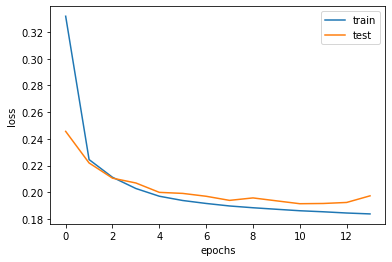

In [225]:
plt.plot(history_2.history['loss'], label = 'train')
plt.plot(history_2.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**network with 2 hidden layers(10,5)**

In [227]:
model_22 = Sequential()
model_22.add(Dense(10, input_dim = 16, activation = 'relu'))
model_22.add(Dense(5, activation = 'relu'))
model_22.add(Dense(1, activation='sigmoid' ))

model_22.summary()

model_22.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history_22 = model_22.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test) , epochs=50, callbacks=[es_callback])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                170       
                                                                 
 dense_35 (Dense)            (None, 5)                 55        
                                                                 
 dense_36 (Dense)            (None, 1)                 6         
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2598/2598 [==============================] - 11s 4ms/step - loss: 0.3007 - accuracy: 0.8825 - val_loss: 0.2322 - val_accuracy: 0.9081
Epoch 2/50
2598/2598 [==============================] - 8s 3ms/step - loss: 0.2109 - accuracy: 0.9170 - val_loss: 0.2054 - val_accuracy: 0.9182
Epoch 3/50
2598/2598 [========

In [228]:
accuracy22 = model_22.evaluate(X_test_pca, y_test)[1]
print('Accuracy: ',accuracy22)

650/650 [==============================] - 2s 2ms/step - loss: 0.1947 - accuracy: 0.9238
Accuracy:  0.923824667930603


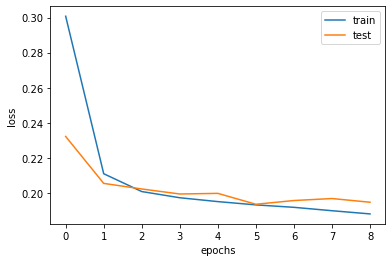

In [229]:
plt.plot(history_22.history['loss'], label = 'train')
plt.plot(history_22.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Accuracy is almost the same as in model with one hidden layer.

**network with 2 hidden layers (20,10)**

In [232]:
model_23 = Sequential()
model_23.add(Dense(20, input_dim = 16, activation = 'relu'))
model_23.add(Dense(10, activation = 'relu'))
model_23.add(Dense(1, activation='sigmoid' ))

model_23.summary()

model_23.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history_23 = model_23.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test) , epochs=50, callbacks=[es_callback])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 20)                340       
                                                                 
 dense_41 (Dense)            (None, 10)                210       
                                                                 
 dense_42 (Dense)            (None, 1)                 11        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2598/2598 [==============================] - 13s 4ms/step - loss: 0.2596 - accuracy: 0.9002 - val_loss: 0.2046 - val_accuracy: 0.9185
Epoch 2/50
2598/2598 [==============================] - 14s 5ms/step - loss: 0.1965 - accuracy: 0.9219 - val_loss: 0.1986 - val_accuracy: 0.9222
Epoch 3/50
2598/2598 [=======

In [233]:
accuracy23 = model_23.evaluate(X_test_pca, y_test)[1]
print('Accuracy: ',accuracy23)

650/650 [==============================] - 1s 2ms/step - loss: 0.1687 - accuracy: 0.9341
Accuracy:  0.9340744018554688


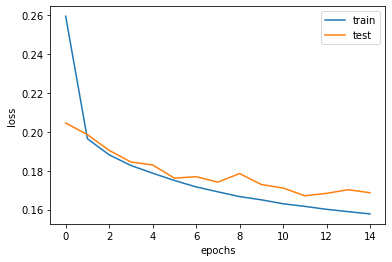

In [234]:
plt.plot(history_23.history['loss'], label = 'train')
plt.plot(history_23.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Model has the best accuracy.

**same model(20,10) with sigmoid as activation function**

In [235]:
model_24 = Sequential()
model_24.add(Dense(20, input_dim = 16, activation = 'sigmoid'))
model_24.add(Dense(10, activation = 'sigmoid'))
model_24.add(Dense(1, activation='sigmoid' ))

model_24.summary()

model_24.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history_24 = model_24.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test) , epochs=50, callbacks=[es_callback])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 20)                340       
                                                                 
 dense_44 (Dense)            (None, 10)                210       
                                                                 
 dense_45 (Dense)            (None, 1)                 11        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2598/2598 [==============================] - 11s 4ms/step - loss: 0.4041 - accuracy: 0.8324 - val_loss: 0.3273 - val_accuracy: 0.8737
Epoch 2/50
2598/2598 [==============================] - 9s 4ms/step - loss: 0.3166 - accuracy: 0.8759 - val_loss: 0.3206 - val_accuracy: 0.8721
Epoch 3/50
2598/2598 [========

In [236]:
accuracy24 = model_24.evaluate(X_test_pca, y_test)[1]
print('Accuracy: ',accuracy24)

650/650 [==============================] - 2s 3ms/step - loss: 0.1859 - accuracy: 0.9239
Accuracy:  0.9238727688789368


Model with relu function was slightly better.

# 3. Conclusion

## 3.1 Dataset without PCA

Results for models with the best parameters:

In [245]:
results1 = pd.DataFrame(data = {'Bayes':[bayes_score], 'Full Tree' : [dtree_score], 'Tree with depth of 7': [dtree_7_score], 'knn5' : [knn5_score], 'knn7':[knn7_score], 'MLPClassifier(10,6)' : [mlp2_score], 'NeuralNet(15)' : [accuracy11], 'NeuralNet (10,6)' : [accuracy2]})
results1

,Bayes,Full Tree,Tree with depth of 7,knn5,knn7,"MLPClassifier(10,6)",NeuralNet(15),"NeuralNet (10,6)"
0,0.842115,0.928059,0.930802,0.949184,0.943457,0.946056,0.942832,0.92113


It can be observed that the NaiveBayes model coped the worst and the best performance was shown by neural networks and KNN Classificator.

## 3.2 Dataset with PCA

Results for models with the best parameters:

In [246]:
results2 = pd.DataFrame(data = {'Bayes':[bayes2_score], 'Full Tree' : [dtree2_score], 'Tree with depth of 10' : [dtree_10_score2], 'knn9': [knn9_score2], 'knn15' : [knn15_score2], 'MLPClassifier(20,10)' : [mlp_score22],'NeuralNet(15)': [accuracy2] ,'NeuralNet(20,10)' : [accuracy23]})
results2

,Bayes,Full Tree,Tree with depth of 10,knn9,knn15,"MLPClassifier(20,10)",NeuralNet(15),"NeuralNet(20,10)"
0,0.824551,0.855734,0.888456,0.918579,0.916991,0.934074,0.92113,0.934074


Same as for data without pca the NaiveBayes model was the worst and the best accuracy was shown by neural networks. KNN Classificator worked a little worse than in the case of the previous database.

# 4. Bibliography

- dataset: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv
- "Uczenie maszynowe z użyciem Scikit-Learn i TensorFlow" Geron Aurelien